#  REGRESIÓN LOGÍSTICA

*Obs: El conjunto de datos a utilizar proviene de la libreria "ISLP", asociada al libro "The Elements of Statistical Learning", publicado por la editorial Springer con los autores G.James, D. Witten, T.Hastie, R.Tibshirani y J.Taylor*

## REGRESIÓN LOGÍSTICA SIMPLE
Dentro del aprendizaje de máquina supervisado en los problemas de clasificación, para un conjunto de datos 

\begin{equation*}
 \{ (x_i, y_i)\}_{i=1}^N
\end{equation*}

con $x_i$ variabe independiente (*predictor*) & $y_i$ variables independiente (*response*), se modelará mediante la función sigmoide a la probabilidad condicional

\begin{equation*}
\mathcal{P}(Y | X) == \mathcal{P} (X)= \dfrac{e^{\beta_0+ \beta_1 X} }{1+e^{\beta_0+ \beta_1 X} }
\end{equation*}


Donde se calculan los parametros del modelo maximizando la función de verosimilitud (*likelihood function*), asignando cada nueva observación a una de las clases dependiendo del valor de dicha probabilidad condicional:

\begin{equation*}
\mathcal{P} (x_i) ~~es~~ \begin{cases} >s  \Rightarrow Clase 1   \\  \leq s \Rightarrow Clase 2  \end{cases}
\end{equation*}

Veamos que en éste modelo se nos será posible conocer, cualitativamente, el cómo están relacionadas las variables del modelo:
1.  $\beta_1~\Rightarrow$ un incremento en X conlleva un incremento en $\mathcal{P}(X)$
2.  $\beta_<~\Rightarrow$ un incremento en X conlleva un decremento en $\mathcal{P}(X)$
3.  $\beta_0$ no resulta de interés

In [2]:
import pandas as pd; import ISLP; from ISLP import load_data; import numpy as np
Tarjeta = load_data("Default"); Tarjeta.head()
Tarjetas=Tarjeta.copy()
Tarjeta.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

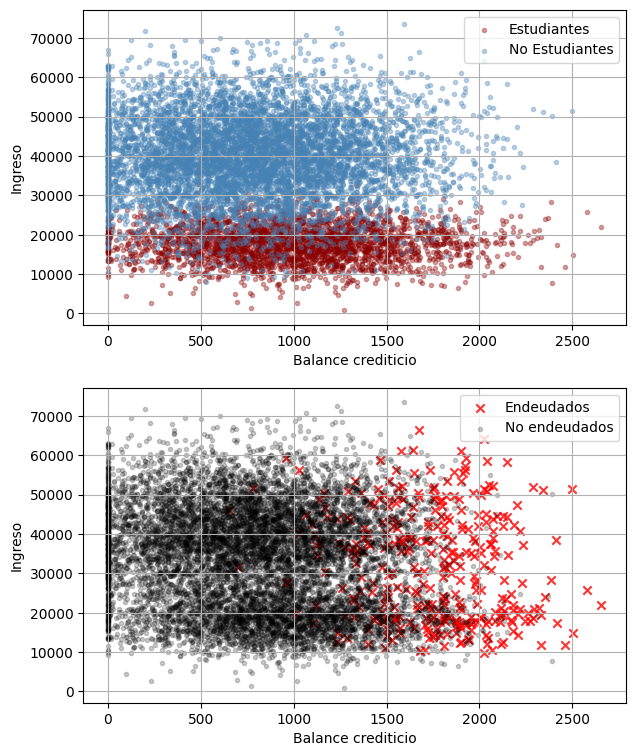

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, figsize=(7, 9))


estudiante_si=Tarjetas[Tarjetas.student == "Yes"]
estudiante_no=Tarjetas[Tarjetas.student == "No"]
axs[0].scatter(estudiante_si["balance"], estudiante_si["income"], label = "Estudiantes",
           marker=".", alpha=0.35, c = "darkred")
axs[0].scatter(estudiante_no["balance"], estudiante_no["income"], label = "No estudiantes",
           marker = ".", alpha=0.35, c="steelblue")
axs[0].set_xlabel("Balance crediticio");axs[0].set_ylabel("Ingreso");
axs[0].grid(True);axs[0].legend(["Estudiantes", "No Estudiantes"])


endeudado_si=Tarjetas[Tarjetas.default == "Yes"]
endeudado_no=Tarjetas[Tarjetas.default == "No"]
axs[1].scatter(endeudado_si["balance"], endeudado_si["income"], label = "Estudiantes",
           marker="x", alpha=0.8, c="r")
axs[1].scatter(endeudado_no["balance"], endeudado_no["income"], label = "No estudiantes",
           marker = ".", alpha=0.2, c="k")

axs[1].set_xlabel("Balance crediticio");axs[1].set_ylabel("Ingreso")
axs[1].grid(True); axs[1].legend(["Endeudados", "No endeudados"])


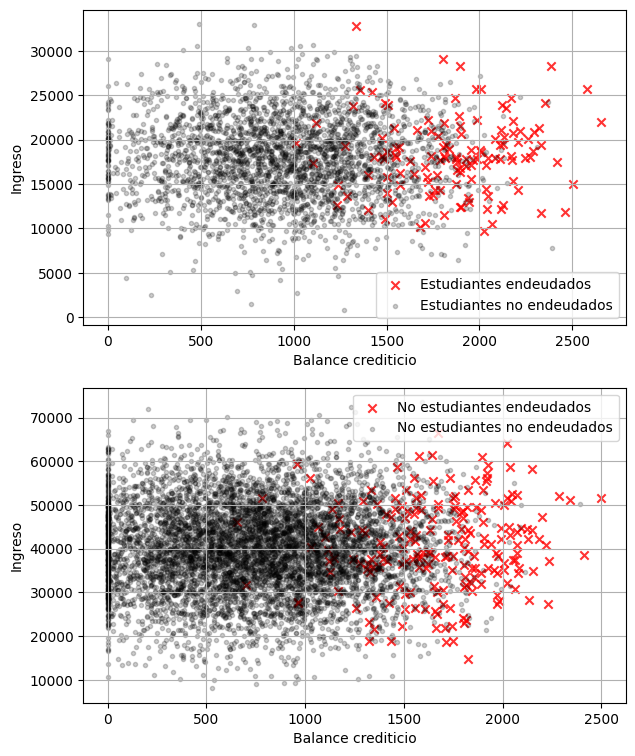

In [4]:
fig, axs = plt.subplots(nrows=2, figsize=(7, 9))

estudiante_Endeudado=estudiante_si[ estudiante_si.default == "Yes"]
estudiante_NoEndeudado=estudiante_si[estudiante_si.default == "No"]
axs[0].scatter(estudiante_Endeudado["balance"], estudiante_Endeudado["income"], label = "Estudiantes",
           marker="x",alpha=0.8, c="r")
axs[0].scatter(estudiante_NoEndeudado["balance"], estudiante_NoEndeudado["income"], label = "No estudiantes",
           marker = ".",  alpha=0.2, c="k")
axs[0].set_xlabel("Balance crediticio");axs[0].set_ylabel("Ingreso");
axs[0].legend(["Estudiantes endeudados", "Estudiantes no endeudados"]); axs[0].grid(True)


NoEstudiante_Endeudado=estudiante_no[estudiante_no.default == "Yes"]
NoEstudiante_NoEndeudado=estudiante_no[estudiante_no.default == "No"]
axs[1].scatter(NoEstudiante_Endeudado["balance"], NoEstudiante_Endeudado["income"], label = "Estudiantes",
           marker="x", alpha=0.8, c="r")
axs[1].scatter(NoEstudiante_NoEndeudado["balance"], NoEstudiante_NoEndeudado["income"], label = "No estudiantes",
           marker = ".", alpha=0.2, c="k")

axs[1].set_xlabel("Balance crediticio");axs[1].set_ylabel("Ingreso")
axs[1].legend(["No estudiantes endeudados", "No estudiantes no endeudados"]); axs[1].grid(True)

Ahora, deseamos realizar una regresión logistica para predecir cuando un ***cliente no pagará su deuda de tarjeta de crédito***, que en nuestro dataset es codificado con la variable categórica ***"default"***

Primero lo haremos mediante la variable categórica ***"student"***.

Para lo anterior será necesario realizar una transformación en la variable de respuesta y un predictor:

\begin{equation*}
default \to \begin{cases} 1~si~default = Yes \\ 0~si~default=No\end{cases}
\end{equation*}, 

\begin{equation*}
student \to \begin{cases} 1~si~student = Yes \\ 0~si~student=No\end{cases}
\end{equation*}

In [5]:
Tarjetas["default"] = Tarjetas["default"].map({"No": int(0), "Yes": int(1) })
Tarjetas["student"] = Tarjetas["student"].map({"No": int(0), "Yes": int(1) })

Realizaremos la regresión logística mediante la libreria ***statsmodels.api***, puesto que así podremos analizar las relaciones entre las variables involucradas

In [6]:
import statsmodels.api as sm
X = sm.add_constant(Tarjetas["student"]); y = Tarjetas["default"]

Logit = sm.GLM(y, X, family=sm.families.Binomial())
resultados_Logit = Logit.fit()
print(resultados_Logit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1454.3
Date:                Wed, 16 Aug 2023   Deviance:                       2908.7
Time:                        14:21:29   Pearson chi2:                 1.00e+04
No. Iterations:                     6   Pseudo R-squ. (CS):           0.001196
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5041      0.071    -49.554      0.0

De lo anterior podemos conlcuir que:
1. El coeficiente $\beta_1$ es positivo, en consecuencia ***las personas estudiantes tenderán a no pagar su deuda de tarjeta de crédito*** ....(*cuanto más $X \to 1$, es decir la persona tienda a ser estudiante, mayor será $\mathcal{P}(X)$, es decir la probabilidad de que no pague su deuda$)

## REGRESIÓN LOGISTICA MULTIPLE
Se generaliza el modelo para un dataset con más predictores:

\begin{equation*}
 \{ (X_i, y_i)\}_{i=1}^N
\end{equation*}

con $X_i = (X_i ^1, X_i^2, \cdots , X_i^P)$ variabe independiente (*predictor*) & $y_i$ variable independiente (*response*). Análogamente se modelará mediante:

\begin{equation*}
\mathcal{P}(Y | X) == \mathcal{P} (X)= \dfrac{e^{\beta_0 + \beta_1 X + \cdots \beta_p X_p}}{1+e^{\beta_0 + \beta_1 X + \cdots \beta_p X_p}}
\end{equation*}


In [7]:
X = sm.add_constant(Tarjetas.drop("default", axis=1))
MLogit = sm.Logit(y, X)
mnlogit_fit =MLogit.fit()
print (mnlogit_fit.summary())

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.4619
Time:                        14:21:29   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
student       -0.6468      0

De ésta tabla concluimos que:
1. El valor $\beta_1$ asociado con "ser estudiante", **AHORA ES NEGATIVA**; es decir en éste modelo concluimos que para valores  constantes *(fijos)* de balance crcediticio y de ingreso, los estudiantes tienden a no pagar sus deudas ...  al tener un p-valor bajo concluimos que si hay relación estadística entre el predictor y la variable de respuesta
2. Las personas que tienen un balance negativo tienden a no pagar sus cuentas; al tener un p-valor bajo concluimos que si hay relación estadística entre el predictor y la variable de respuesta.
3. El p-valor asociado a la prueba de hipótesis de una relación entre el ingreso y el estar endeudado es tal, que concluiríamos que no hay relación estadística entre éste predictor y la variable de respuesta
4. 

Quitemos de nuestro modelo al predictor "income":

In [8]:
X_ = sm.add_constant(X.drop("income", axis = 1))
MLogit_ = sm.MNLogit(y,X_)
resultados= MLogit_.fit()
print(resultados.summary())

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:                default   No. Observations:                10000
Model:                        MNLogit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.4619
Time:                        14:21:29   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
 default=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.7495      0.369    -29.115      0.000     -11.473     -10.026
student       -0.7149      0

De ésta tabla concluimos lo siguiente:
1. Existe evidencia a favor de una relación estadística entre el predictor "student" y la variable de respuesta "default" (ésto se ve en el p-valor tan bajo); también tenemos un coeficiente de $\beta_1$ negativo: indicandos que *los estudiantes tienen menos probabilidad a pagar sus deudas a comparación de los no estudiantes*
2. Existe evidencia a favor de una relación estadística entre el precitor "balance" y la variable de respuests "default"

Desde los scaterrplots del principio, vimos que existe cierta relación entre el balance crediticio y la variable "default"; analicemos lo anterior:

In [9]:
estudiantes_si = Tarjetas[Tarjetas.student == 1]
estudiantes_no = Tarjetas[Tarjetas.student == 0]
estudiantes_si

,default,student,balance,income
1,0,1,817.180407,12106.134700
5,0,1,919.588530,7491.558572
7,0,1,808.667504,17600.451344
10,0,1,0.000000,21871.073089
11,0,1,1220.583753,13268.562221
...,...,...,...,...
9980,0,1,770.015741,13684.789952
9986,0,1,401.332674,15332.017833
9989,0,1,999.281112,20013.350644
9994,0,1,172.412987,14955.941689


In [10]:
def logistic_function(coeficientes, X1, X2):
    # Añadir una columna de unos para el intercepto
    X = np.column_stack((np.ones_like(X1), X1, X2))
    
    # Calcular el valor lineal de la regresión
    linear_predictor = np.dot(X, coeficientes)
    
    # Calcular la función logística
    probabilities = 1 / (1 + np.exp(-linear_predictor))
    
    
    return probabilities

In [11]:
coeficientes = resultados.params

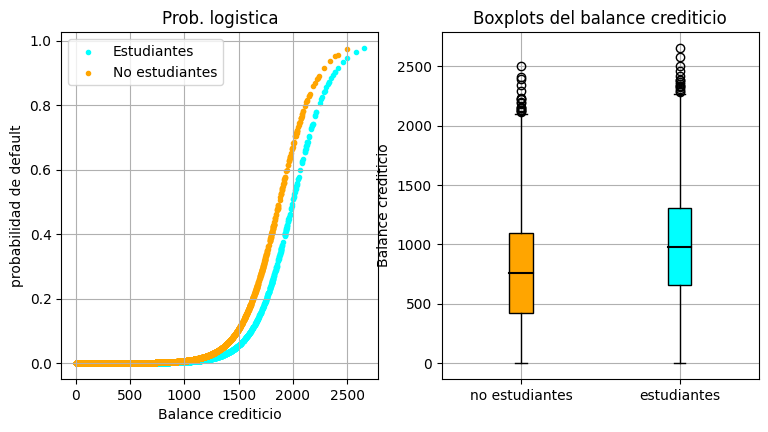

In [12]:
estudiantes_si = Tarjetas[Tarjetas.student == 1]
estudiantes_no = Tarjetas[Tarjetas.student == 0]

probabilidades_est = logistic_function(coeficientes, 
                                   estudiantes_si["student"],
                                   estudiantes_si["balance"])

probabilidades_np_est = logistic_function(coeficientes, 
                                   estudiantes_no["student"],
                                   estudiantes_no["balance"])



fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))

ax1.scatter(estudiantes_si["balance"], probabilidades_est,marker=".", color = "cyan" )
ax1.scatter(estudiantes_no["balance"], probabilidades_np_est,marker=".", color = "orange")
ax1.grid(); ax1.set_xlabel("Balance crediticio"); ax1.set_ylabel("probabilidad de default")
ax1.legend(["Estudiantes", "No estudiantes"])
ax1.set_title("Prob. logistica")

data = [estudiantes_no["balance"], estudiantes_si["balance"]]
s=ax2.boxplot(data, patch_artist = True,vert = True,
            labels = ["no estudiantes", "estudiantes"],
            medianprops = dict(color = "black", linewidth = 1.5))
ax2.grid(); ax2.set_ylabel("Balance crediticio")
ax2.set_title("Boxplots del balance crediticio")
colors = ['orange', 'cyan']
for patch,color in zip(s["boxes"], colors):
    patch.set_facecolor(color)

De lo anterior concluimos que:
1. Para un mismo valor de balance crediticio, al comparar entre a quien otorgarle el préstamo resultará más conveniente entregarselo al estudiante puesto que estos, para un mismo valor de balance crediticio, tenderán a pagarlo (tienen una probabilidad más baja de no quedar a deber)
2. A pesar del punto anterior, del gráfico de cajas derecho, los estudiantes tienen a tener un mayor balance crediticio, pero quienes tienen un mayor balance crediticio tienden a quedar a deber.

En conclusión; si no contamos con información más allá de si se trata de un estudiante o no, se le debe entregar el crédito al no-estudiante. Pero si se cuenta con información referente al historial crediticio, para un mismo valor de ésta variable, se le debe asignar el préstamo al estudiante.

In [13]:
X = sm.add_constant(Tarjetas.drop("default", axis=1))
MLogit = sm.Logit(y, X)
mnlogit_fit =MLogit.fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


Otro ejemplo

#  UTILIZANDO CROSS VALIDATION

In [15]:
X = Tarjetas.drop(columns = ["student", "balance"])
Y = Tarjetas["default"]

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression; LogR= LogisticRegression()

cross_val_score(LogR,X,Y, cv = 10).mean()

0.9766999999999999